In [1]:
from __future__ import print_function, division

In [2]:
# This changes the current directory to the base saga directory - make sure to run this first!
# This is necessary to be able to import the py files and use the right directories,
# while keeping all the notebooks in their own directory.
import os
import sys
import time
import shutil

import urllib

if 'saga_base_dir' not in locals():
    saga_base_dir = os.path.abspath('..')
if saga_base_dir not in sys.path:
    os.chdir(saga_base_dir)

In [3]:
import hosts
import decals

import numpy as np

from astropy import units as u
from astropy.coordinates import SkyCoord, Angle
from astropy import table
from astropy.table import Table
from astropy.io import fits

from astropy.utils import data

import tqdm
from IPython import display

In [4]:
%matplotlib inline
from matplotlib import style, pyplot as plt

plt.style.use('seaborn-deep')
plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['figure.figsize'] = (14, 8)

# Load the bricks and SAGA hosts

In [5]:
bricks = Table.read('decals_dr4/survey-bricks.fits.gz')
bricksdr3 = Table.read('decals_dr3/survey-bricks-dr3.fits.gz')
bricksdr4 = Table.read('decals_dr4/survey-bricks-dr4.fits.gz')

In [6]:
paper1nsas_comp = [166313,147100,165536,61945,132339,149781,33446,150887]
paper1nsas_incomp = [161174,85746,145729,140594,126115,13927,137625,129237]
paper1nsas = paper1nsas_comp + paper1nsas_incomp

In [7]:
hostobjs = hosts.get_saga_hosts_from_google()
for host in hostobjs:
    host.fnsdss = 'catalogs/base_sql_nsa{}.fits.gz'.format(host.nsaid)
    
hostsbyname = {h.name:h for h in hostobjs}

paperhosts = [h for h in hostobjs if h.nsaid in paper1nsas]
assert len(paperhosts) == len(paper1nsas)

Using cached version of google hosts list from file "hosts_dl.pkl2"


In [8]:
host_bricks_3 = decals.find_host_bricks(paperhosts, bricksdr3, bricks)
host_bricks_4 = decals.find_host_bricks(paperhosts, bricksdr4, bricks)

host_bricks_dct = {3:host_bricks_3, 4:host_bricks_4}

# Build combined catalogs for every host

In [9]:
for hostobj in paperhosts:
    hbricks = host_bricks_3[host_bricks_3['closest_host_name'] == hostobj.name]
    catfn = 'decals_dr3/'

In [10]:
def load_host_catalog(hostobj, drnum):
    host_bricks = host_bricks_dct[drnum]
    tabs = []
    for brick in host_bricks[host_bricks['closest_host_name'] == hostobj.name]:
        catfn = 'decals_dr{}/catalogs/tractor-{}.fits'.format(drnum, brick['brickname'])
        cat = Table.read(catfn)
        cat['objname'] = ['{}-{}'.format(row['brickname'], row['objid']) for row in cat]
        tabs.append(cat)
    if tabs:
        return table.vstack(tabs)

In [11]:
for hostobj in tqdm.tqdm_notebook(paperhosts):
    hostobj.cats3 = load_host_catalog(hostobj, 3)
    
[(hostobj.name, len(hostobj.cats3)) for hostobj in paperhosts if hostobj.cats3 is not None]

Widget Javascript not detected.  It may not be installed or enabled properly.


[('Odyssey', 145041),
 ('Alice', 237279),
 ('Gilgamesh', 94874),
 ('AnaK', 182540),
 ('Dune', 231112),
 ('Sopranos', 286959),
 ('Narnia', 158462),
 ('Bandamanna', 59030),
 ('OBrother', 17901),
 ('Catch22', 3951),
 ('HarryPotter', 44918),
 ('Oz', 41667),
 ('ScoobyDoo', 94704),
 ('Othello', 138656)]

In [12]:
for hostobj in tqdm.tqdm_notebook(paperhosts):
    hostobj.cats4 = load_host_catalog(hostobj, 4)
    
[(hostobj.name, len(hostobj.cats4)) for hostobj in paperhosts if hostobj.cats4 is not None]

Widget Javascript not detected.  It may not be installed or enabled properly.


[('MobyDick', 86799), ('StarTrek', 86644)]

## Compute surface brightnesses

In [13]:
for host in tqdm.tqdm_notebook(paperhosts):
    for cat in (host.cats3, host.cats4):
        if cat is not None:
            decals.mags_catalog(cat)
            decals.aperture_sbs_catalog(cat, bandname='r')
            decals.interpolate_catalog_sb(cat, loopfunc=lambda x: tqdm.tqdm_notebook(x, leave=False))

Widget Javascript not detected.  It may not be installed or enabled properly.


decals.py:97: RuntimeWarning: divide by zero encountered in log10
  mag = np.array(22.5 - 2.5*np.log10(flux))
decals.py:97: RuntimeWarning: invalid value encountered in log10
  mag = np.array(22.5 - 2.5*np.log10(flux))
/Users/erik/miniconda3/envs/saga/lib/python2.7/site-packages/astropy/units/quantity.py:885: RuntimeWarning: divide by zero encountered in power
  return super(Quantity, self).__pow__(other)
/Users/erik/miniconda3/envs/saga/lib/python2.7/site-packages/astropy/units/quantity.py:841: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__truediv__(other)
decals.py:132: RuntimeWarning: divide by zero encountered in log10
  return np.array(22.5 - 2.5*np.log10(apflux) + A) * u.mag * u.arcsec**-2
decals.py:132: RuntimeWarning: invalid value encountered in log10
  return np.array(22.5 - 2.5*np.log10(apflux) + A) * u.mag * u.arcsec**-2
Widget Javascript not detected.  It may not be installed or enabled properly.


decals.py:131: RuntimeWarning: divide by zero encountered in log10
  A = 2.5*np.log10(np.pi*(rad.to(u.arcsec).value)**2)
decals.py:132: RuntimeWarning: invalid value encountered in add
  return np.array(22.5 - 2.5*np.log10(apflux) + A) * u.mag * u.arcsec**-2
Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


# Overall quality measures 

In [14]:
psfdepths = []
galdepths = []
for host in paperhosts:
    for cat in (host.cats3, host.cats4):
        if cat is not None:
            scs = SkyCoord(cat['ra'], cat['dec'], unit=u.deg)
            subcat = cat[host.within_environs(scs)]
            
            if 'decam_galdepth' in subcat.colnames:
                psfdepthr = subcat['decam_depth'][:, 2]
                galdepthr = subcat['decam_galdepth'][:, 2]
            else:
                psfdepthr = subcat['psfdepth_r']
                galdepthr = subcat['galdepth_r']
            psfdepths.append(-2.5*(np.log10(5*psfdepthr**-0.5)-9))
            galdepths.append(-2.5*(np.log10(5*galdepthr**-0.5)-9))

/Users/erik/miniconda3/envs/saga/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in power
/Users/erik/miniconda3/envs/saga/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in power


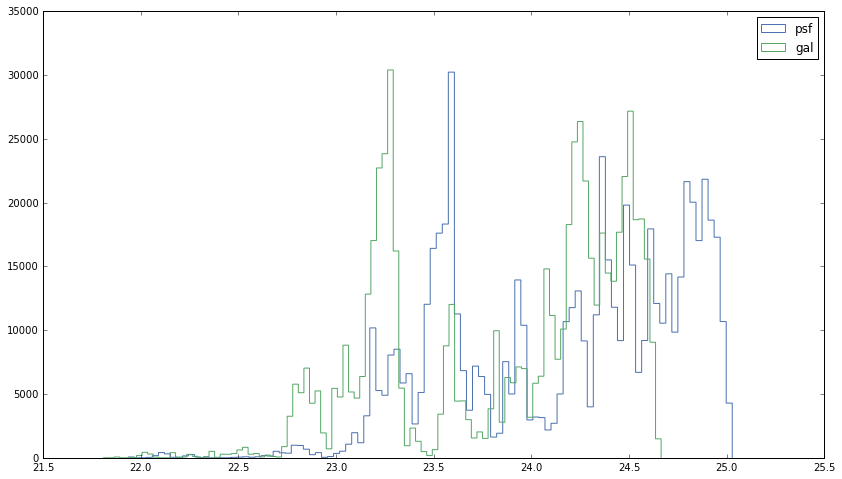

In [15]:
psfdepthsall = np.concatenate(psfdepths)
galdepthsall = np.concatenate(galdepths)

plt.hist(psfdepthsall[np.isfinite(psfdepthsall)], bins=100, histtype='step', label='psf')
plt.hist(galdepthsall[np.isfinite(galdepthsall)], bins=100, histtype='step', label='gal')
plt.legend(loc=0)
None

# Look at some *example* catalogs

In [16]:
host = hostobjs[0]
cat = hostobjs[0].cats3

scs = SkyCoord(cat['ra'], cat['dec'], unit=u.deg)
sep = scs.separation(host.coords)
cat = cat[sep < host.environsarcmin*u.arcmin]

/Users/erik/miniconda3/envs/saga/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in greater


nlowsb= 44


2476p202-450mag_r=20.586271286sbeff_r=24.5934065751,2476p202-715mag_r=20.3857479095sbeff_r=37.2588173046,2477p197-759mag_r=18.2702465057sbeff_r=31.1301897295,2478p195-2590mag_r=20.9697761536sbeff_r=31.8439584193
2478p195-4282mag_r=20.7429084778sbeff_r=26.549063482,2478p200-6mag_r=20.3502197266sbeff_r=25.4277524727,2478p200-4396mag_r=20.6079826355sbeff_r=24.5260340332,2479p197-29mag_r=20.3775558472sbeff_r=25.6079593966
2479p197-563mag_r=20.5242118835sbeff_r=25.4743901636,2479p197-714mag_r=20.6493434906sbeff_r=25.3186545183,2479p197-2111mag_r=20.6180858612sbeff_r=24.5354889939,2479p197-3695mag_r=20.9754238129sbeff_r=24.641584166
2479p197-4030mag_r=20.6593570709sbeff_r=25.3495706953,2479p197-4369mag_r=20.1378555298sbeff_r=24.7682002339,2479p202-354mag_r=20.5389919281sbeff_r=24.6013505625,2479p202-640mag_r=20.5016899109sbeff_r=25.2728902649
2480p200-14mag_r=18.9615821838sbeff_r=36.6034110415,2480p200-895mag_r=19.555065155sbeff_r=26.217331135,2480p200-2249mag_r=19.8074302673sbeff_r=24.5226214849,2481p195-1000mag_r=20.1640911102sbeff_r=30.8877998908
2481p195-2136mag_r=20.9791736603sbeff_r=24.6662668753,2481p195-3822mag_r=19.9327697754sbeff_r=25.3271228953,2481p195-4807mag_r=20.192199707sbeff_r=24.7736447303,2482p197-2mag_r=20.9094409943sbeff_r=24.9487199525
2482p197-2225mag_r=20.7546653748sbeff_r=25.3396845211,2482p197-2782mag_r=20.4544353485sbeff_r=25.0661888613,2483p200-4646mag_r=20.674659729sbeff_r=24.9101549915,2483p200-4820mag_r=16.8170909882sbeff_r=27.0380857554
2484p195-1594mag_r=20.4528598785sbeff_r=24.8357065085,2484p195-2152mag_r=20.6783103943sbeff_r=24.8681923513,2484p195-3850mag_r=19.0855007172sbeff_r=25.9648771675,2484p195-4008mag_r=20.9257411957sbeff_r=24.9253028899
2484p195-4106mag_r=20.5365161896sbeff_r=24.9131450537,2484p195-4211mag_r=20.3484573364sbeff_r=24.7892367038,2484p202-12mag_r=20.6151332855sbeff_r=25.3657091122,2484p202-706mag_r=17.0301151276sbeff_r=46.010157039
2485p197-63mag_r=20.5360221863sbeff_r=24.9274481718,2485p197-920mag_r=20.6391067505sbeff_r=24.9585070986,2485p197-2011mag_r=20.7921562195sbeff_r=24.5510897803,2485p197-2341mag_r=20.6563034058sbeff_r=24.778729949
2485p197-3931mag_r=20.7784938812sbeff_r=25.3640245688,2486p200-661mag_r=20.0164432526sbeff_r=35.1741778164,2486p200-4152mag_r=20.6913909912sbeff_r=24.7619793186,2486p200-4292mag_r=16.7704925537sbeff_r=27.2917213985


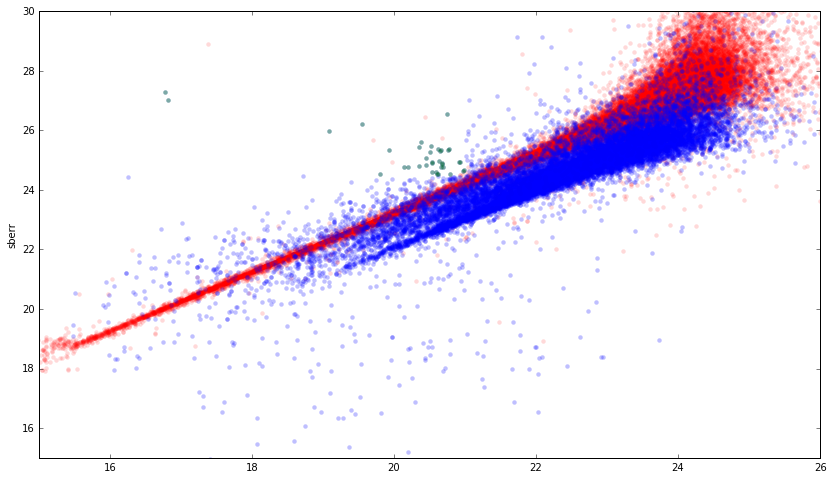

In [17]:
fig, ax1 = plt.subplots(1,1)

psfs = cat['type'] == 'PSF '
lowsb_saga = (cat['decam_mag'][:, 2] < 21) & (cat['sbeff_r']>24.5) & np.isfinite(cat['sbeff_r']) & ~psfs
print('nlowsb=', np.sum(lowsb_saga))


ax1.scatter(cat['mag_r'][psfs], cat['sbeff_r'][psfs], alpha=.15, lw=0, c='r')
ax1.scatter(cat['mag_r'][~psfs], cat['sbeff_r'][~psfs], alpha=.25, lw=0)
ax1.scatter(cat['mag_r'][lowsb_saga], cat['sbeff_r'][lowsb_saga], alpha=.35, lw=0, c='g')
ax1.set_ylabel('sberr')    
ax1.set_xlim(15, 26)
ax1.set_ylim(15, 30)

decals.show_decals_objects_in_nb(cat[lowsb_saga], 4, info_cols=['mag_r', 'sbeff_r'])

/Users/erik/miniconda3/envs/saga/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in greater


nlowsb= 100


2475p200-1824decam_mag_r=20.8320064545sb_r_0p5=25.8713417053,2476p195-3690decam_mag_r=20.7130851746sb_r_0p5=24.5412139893,2476p195-4168decam_mag_r=20.0663070679sb_r_0p5=25.8236122131,2476p195-4827decam_mag_r=20.9686107635sb_r_0p5=26.0192279816
2476p202-15decam_mag_r=20.2626590729sb_r_0p5=25.7077674866,2476p202-17decam_mag_r=20.2105484009sb_r_0p5=25.468755722,2476p202-450decam_mag_r=20.586271286sb_r_0p5=24.5258750916,2477p197-413decam_mag_r=19.8963317871sb_r_0p5=25.1386890411
2477p197-3923decam_mag_r=20.9988746643sb_r_0p5=27.1462554932,2478p195-95decam_mag_r=19.7930049896sb_r_0p5=24.5665283203,2478p195-325decam_mag_r=20.1033248901sb_r_0p5=25.2297267914,2478p195-1028decam_mag_r=18.9320335388sb_r_0p5=27.8153553009
2478p195-1874decam_mag_r=20.0043945312sb_r_0p5=25.4510002136,2478p195-2961decam_mag_r=20.8558578491sb_r_0p5=25.6708717346,2478p200-6decam_mag_r=20.3502197266sb_r_0p5=25.0052585602,2478p200-786decam_mag_r=20.2602539062sb_r_0p5=25.3732528687
2478p200-1187decam_mag_r=20.1321792603sb_r_0p5=26.683555603,2478p200-1887decam_mag_r=20.5993843079sb_r_0p5=25.4464988708,2479p197-29decam_mag_r=20.3775558472sb_r_0p5=24.5118160248,2479p197-481decam_mag_r=17.9029045105sb_r_0p5=24.5105476379
2479p197-714decam_mag_r=20.6493434906sb_r_0p5=24.7115020752,2479p197-1084decam_mag_r=19.7665653229sb_r_0p5=24.7168273926,2479p197-1090decam_mag_r=20.7665500641sb_r_0p5=25.408367157,2479p197-2102decam_mag_r=20.6970787048sb_r_0p5=25.489440918
2479p197-3528decam_mag_r=18.9746818542sb_r_0p5=25.2143478394,2479p197-3530decam_mag_r=20.9648303986sb_r_0p5=25.5067310333,2479p197-3533decam_mag_r=20.0532817841sb_r_0p5=24.8457717896,2479p197-3917decam_mag_r=20.1422767639sb_r_0p5=24.7016124725
2479p197-4030decam_mag_r=20.6593570709sb_r_0p5=25.4709396362,2479p202-17decam_mag_r=19.2327575684sb_r_0p5=26.6582336426,2479p202-146decam_mag_r=20.000415802sb_r_0p5=24.7684459686,2479p202-413decam_mag_r=20.5035037994sb_r_0p5=25.3698940277
2479p202-640decam_mag_r=20.5016899109sb_r_0p5=25.2504234314,2479p202-783decam_mag_r=20.736415863sb_r_0p5=28.8750305176,2479p202-922decam_mag_r=20.725227356sb_r_0p5=26.1174087524,2479p202-924decam_mag_r=19.4923820496sb_r_0p5=24.6771850586
2479p202-925decam_mag_r=19.7908363342sb_r_0p5=25.0970573425,2479p202-1330decam_mag_r=20.7755432129sb_r_0p5=24.8736400604,2479p202-1959decam_mag_r=20.8785552979sb_r_0p5=24.5021629333,2479p202-2122decam_mag_r=19.7316741943sb_r_0p5=27.0637187958
2479p202-3156decam_mag_r=20.4263362885sb_r_0p5=24.6956920624,2480p192-4018decam_mag_r=20.116481781sb_r_0p5=24.5581169128,2480p192-4019decam_mag_r=20.3163013458sb_r_0p5=24.6080570221,2480p200-165decam_mag_r=20.0567836761sb_r_0p5=25.2187690735


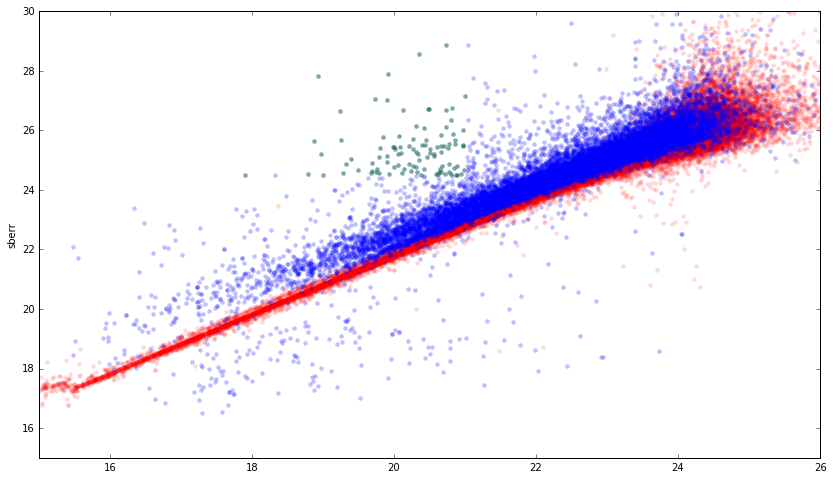

In [18]:
fig, ax1 = plt.subplots(1,1)

cat['decam_mag_r'] = cat['decam_mag'][:, 2]

psfs = cat['type'] == 'PSF '

lowsb_saga = (cat['decam_mag'][:, 2] < 21) & (cat['sb_r_0p5']>24.5) & np.isfinite(cat['sb_r_0p5']) & ~psfs
print('nlowsb=', np.sum(lowsb_saga))

ax1.scatter(cat['mag_r'][psfs], cat['sb_r_0p5'][psfs], alpha=.15, lw=0, c='r')
ax1.scatter(cat['mag_r'][~psfs], cat['sb_r_0p5'][~psfs], alpha=.25, lw=0)
ax1.scatter(cat['mag_r'][lowsb_saga], cat['sb_r_0p5'][lowsb_saga], alpha=.35, lw=0, c='g')
ax1.set_ylabel('sberr')    
ax1.set_xlim(15, 26)
ax1.set_ylim(15, 30)

decals.show_decals_objects_in_nb(cat[lowsb_saga], 4, info_cols=['decam_mag_r', 'sb_r_0p5'])

This strongly suggests that sbeff_r is the way to go

# Check for SDSS overlap

Widget Javascript not detected.  It may not be installed or enabled properly.


Could not find file "catalogs/base_sql_nsa13927.fits.gz" but did find "catalogs/NSA13927_sdss.dat" so using that.
Could not find file "catalogs/base_sql_nsa85746.fits.gz" but did find "catalogs/NSA85746_sdss.dat" so using that.
Could not find file "catalogs/base_sql_nsa33446.fits.gz" but did find "catalogs/NSA33446_sdss.dat" so using that.
Missing base catalog for Oz
Missing base catalog for ScoobyDoo
Could not find file "catalogs/base_sql_nsa145729.fits.gz" but did find "catalogs/NSA145729_sdss.dat" so using that.



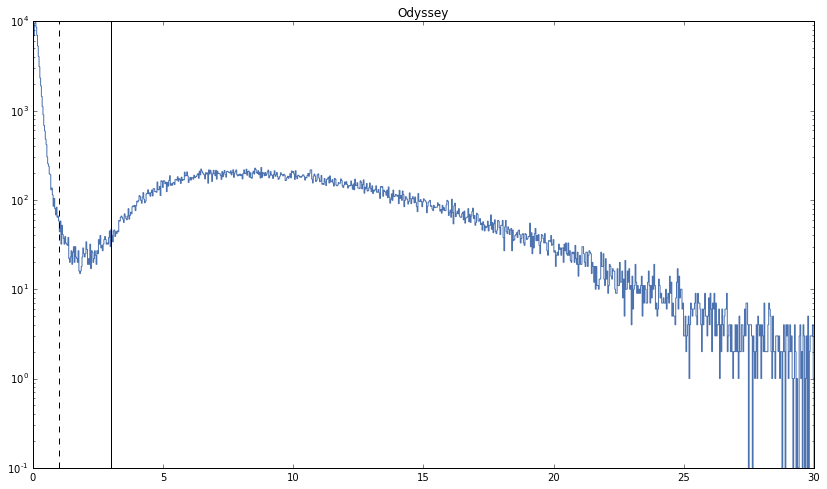

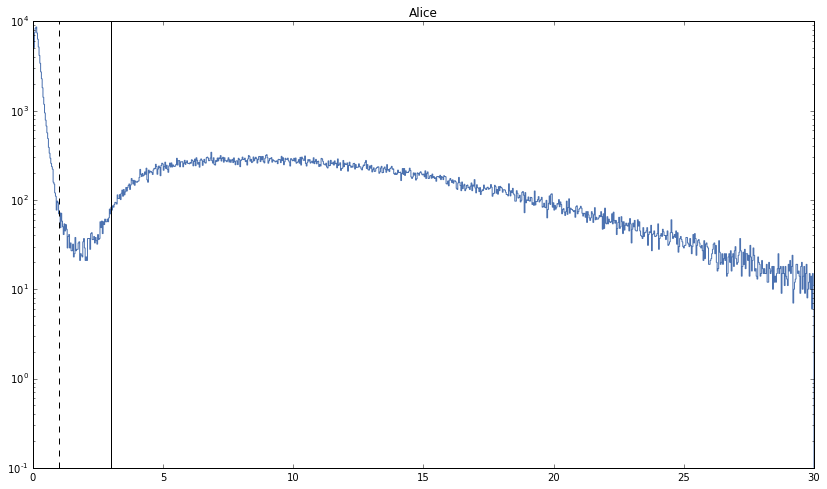

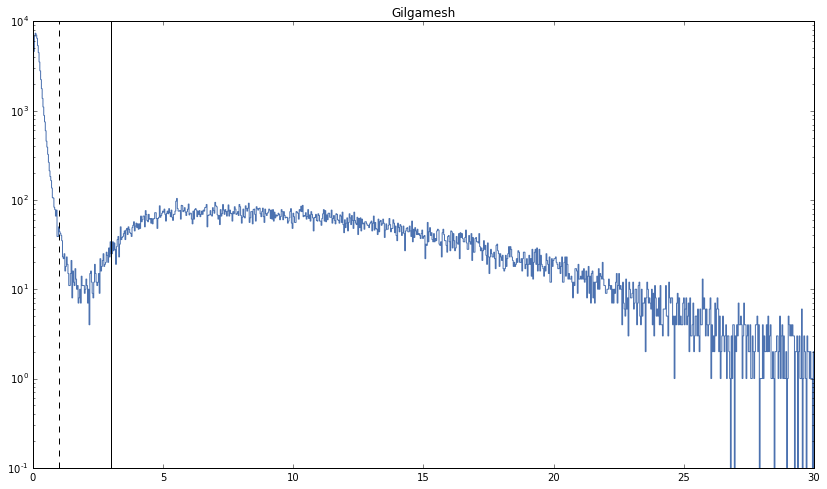

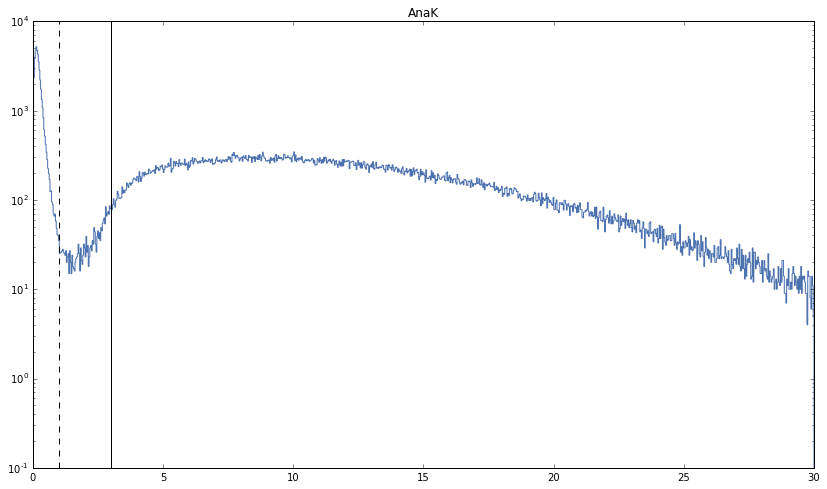

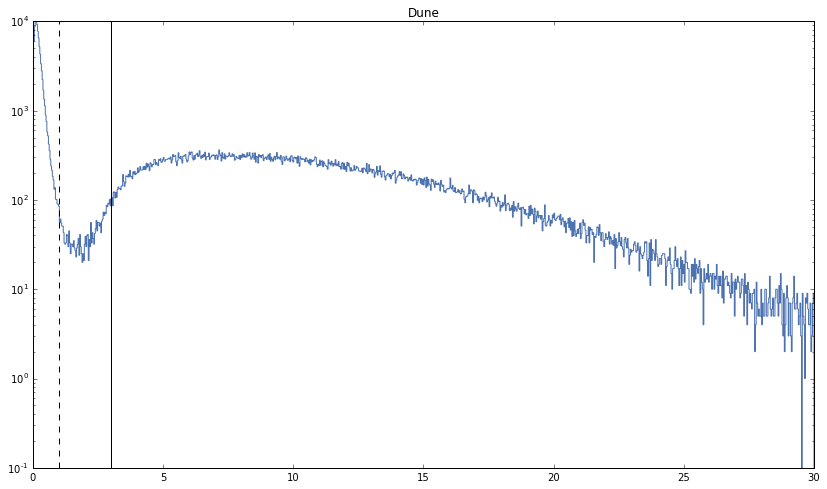

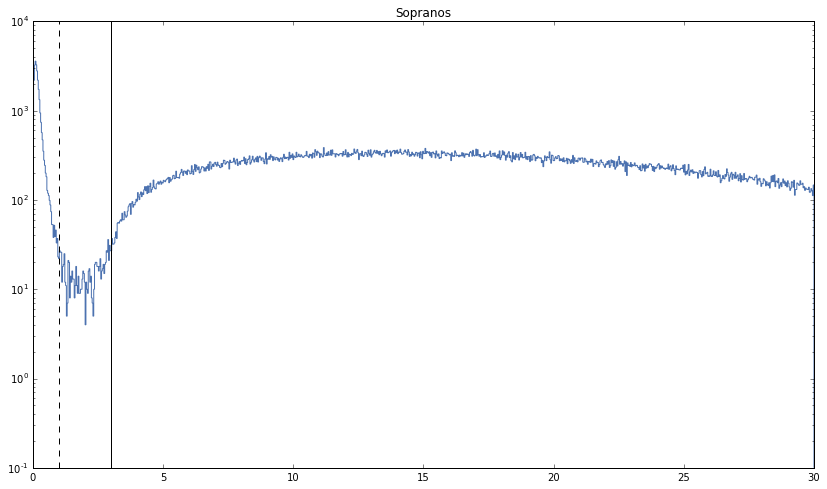

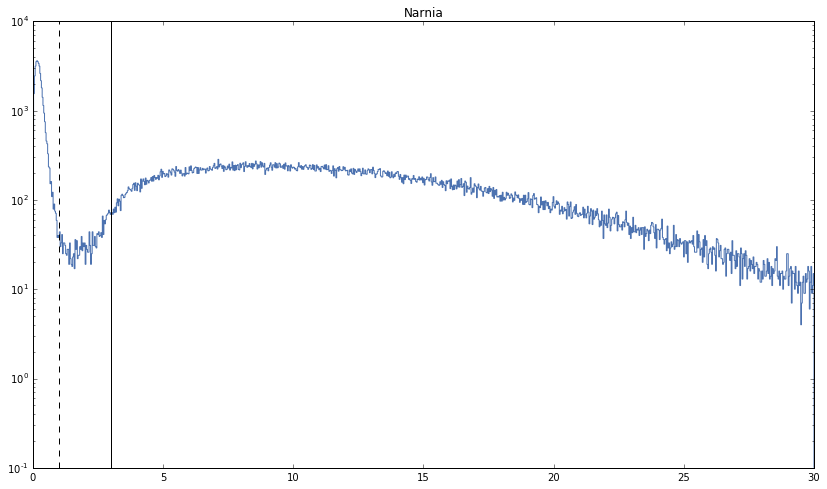

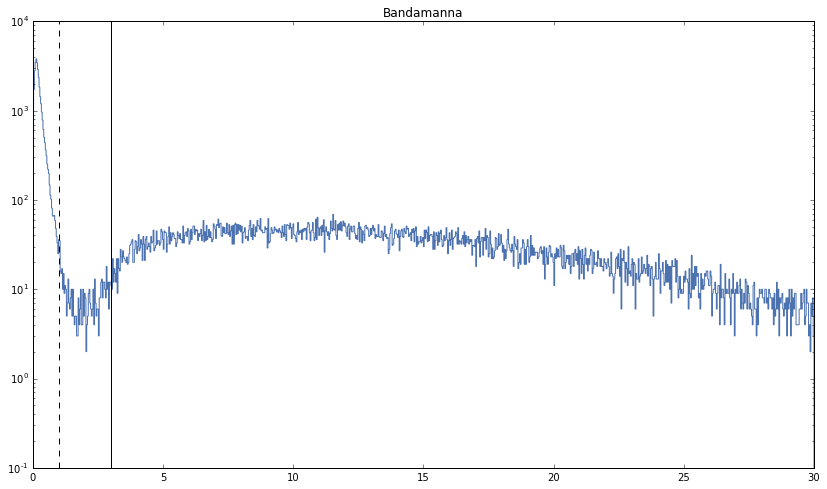

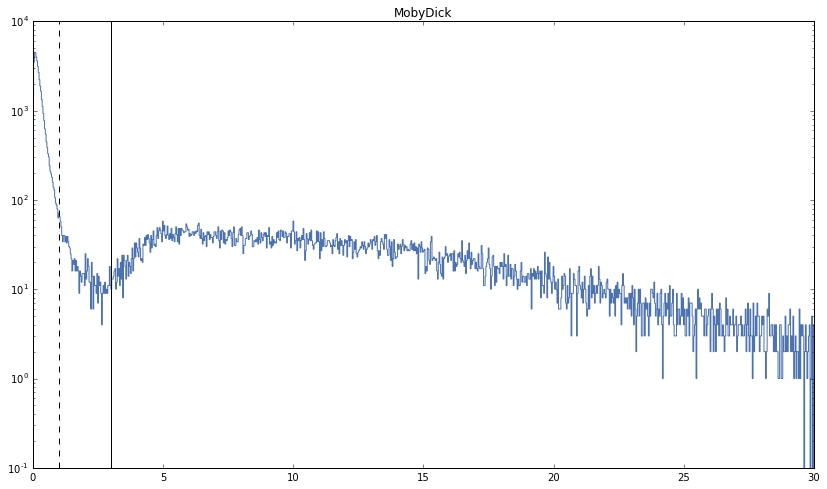

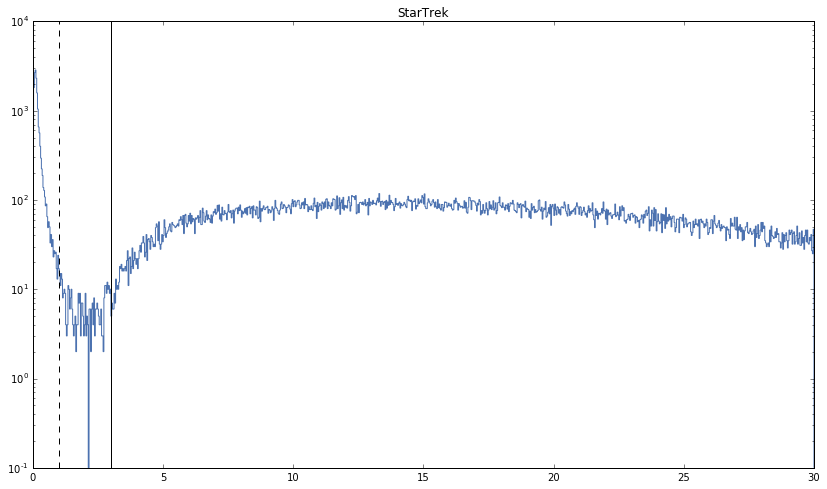

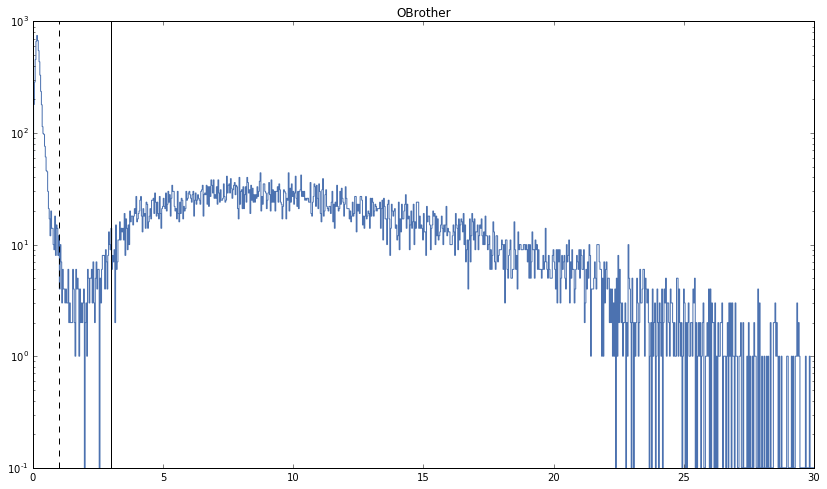

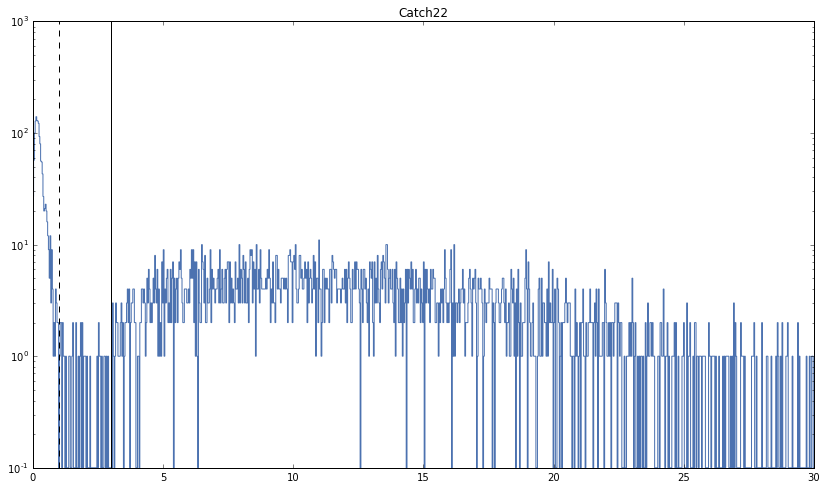

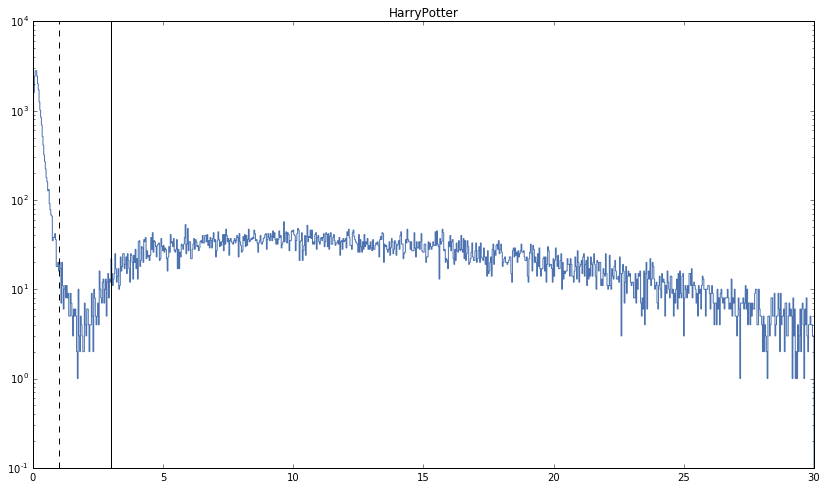

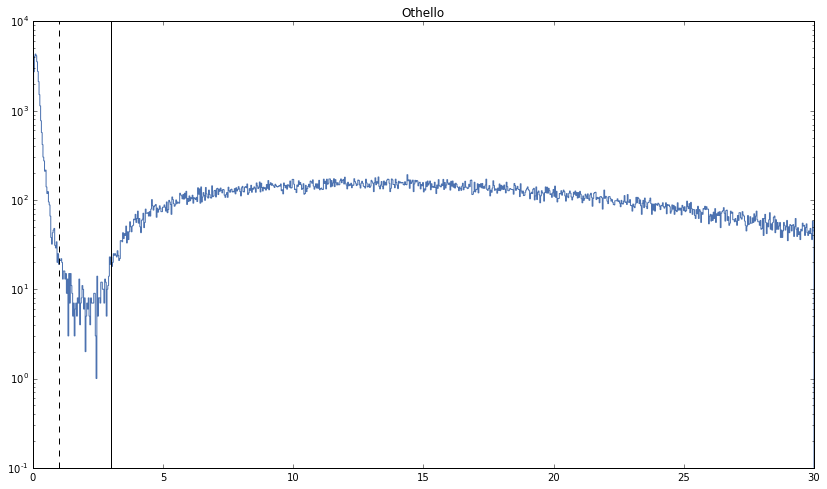

In [19]:
for host in tqdm.tqdm_notebook(paperhosts):
    try:
        sdsscat = host.get_sdss_catalog()
    except IOError:
        print('Missing base catalog for', host.name)
        sdsscat = None
    
    for cat in (host.cats3, host.cats4):
        
        if cat is not None:
            d2ds = np.full(len(cat), -1, dtype=float)
            if sdsscat is not None:
                dcatsc = SkyCoord(cat['ra'], cat['dec'], unit=u.deg)
                idx, d2d, _ = dcatsc.match_to_catalog_sky(sdsscat['coord'])

                plt.figure()
                plt.hist(d2d.arcsec, bins=1000, histtype='step',range=(0, 30), log=True)
                plt.axvline(1, c='k', ls='--')
                plt.axvline(3, c='k')
                plt.title(host.name)
                d2ds = d2d.to(u.arcsec)
                
            cat['dist_basecat'] = d2ds
            cat['dist_basecat'].description = '-1 means "unknown", e.g. base catalog missing'

# Build the combined list of candidate objects

In [51]:
maxnamelen = max([len(h.name) for h in paperhosts])

tostack = []
for host in tqdm.tqdm_notebook(paperhosts):
    for drnum, cat in [(3, host.cats3), (4, host.cats4)]:
        if cat is not None:
            psfs = cat['type'] == 'PSF '
            lowsb_saga = (cat['mag_r'] < 21) & (cat['sbeff_r']>24.5) & np.isfinite(cat['sbeff_r']) & ~psfs
            subcat = cat[lowsb_saga]['objname', 'ra', 'dec', 'mag_r', 'sbeff_r', 'dist_basecat']
            subcat['dr'] = np.full(len(subcat), drnum, dtype=int)
            subcat['hostname'] = np.full(len(subcat), host.name, dtype='S'+str(maxnamelen))
            tostack.append(subcat)
            
towrite = table.vstack(tostack)
towrite.sort(['hostname', 'dist_basecat'])
towrite.meta = {}

towrite['inbasecat'] = np.full(len(towrite), 'unknown', dtype='S'+str(len('unknown')))
towrite['inbasecat'][towrite['dist_basecat'] > 0*u.arcsec] = 'yes'
towrite['inbasecat'][towrite['dist_basecat'] > 1*u.arcsec] = 'maybe'
towrite['inbasecat'][towrite['dist_basecat'] > 3*u.arcsec] = 'no'
towrite['inbasecat'].description = 'estimate of "is this in the base catalogs": <1 arcsec is yes, 1-3 is maybe, >3 is no'

towrite

/Users/erik/miniconda3/envs/saga/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in less
/Users/erik/miniconda3/envs/saga/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in greater


objname,ra,dec,mag_r,sbeff_r,dist_basecat,dr,hostname,inbasecat
,deg,deg,mag,mag / arcsec2,arcsec,,,
str13,float64,float64,float32,float64,float64,int64,str11,str7
1793m010-3424,179.392364348,-0.949218852807,20.6404,24.6834302137,0.0278108343648,3,Alice,yes
1793m005-2489,179.405986637,-0.50200403548,19.8404,25.0434544813,0.0722699665925,3,Alice,yes
1801m002-578,180.009418942,-0.348665453861,18.3362,40.5233966113,0.0814716112411,3,Alice,yes
1808m007-4276,180.785549654,-0.622661654338,20.8815,34.9824937116,0.0820040213309,3,Alice,yes
1803m002-3301,180.357553868,-0.171152948514,19.4858,41.3106651771,0.0847786483567,3,Alice,yes
1796m005-1750,179.541905943,-0.540049236444,16.4548,37.4599988103,0.0941092192055,3,Alice,yes
1803m002-3331,180.38212919,-0.1720417203,19.416,33.7918401411,0.099882524005,3,Alice,yes
1796m002-783,179.609997374,-0.336241829793,16.5778,39.0373920488,0.100805260263,3,Alice,yes


In [58]:
htmlyes = decals.show_decals_objects_in_nb(towrite[towrite['inbasecat']=='yes'], dr='fromcatalog', nrows=4,
                                           info_cols=['mag_r', 'sbeff_r', 'hostname', 'dr', 'dist_basecat'], sdss_link=True)
htmlnotyes = decals.show_decals_objects_in_nb(towrite[towrite['inbasecat']!='yes'], dr='fromcatalog', nrows=4,
                                           info_cols=['mag_r', 'sbeff_r', 'hostname', 'dr', 'dist_basecat'], sdss_link=True)

with open('lowsb_decals_notinbasecat.html', 'w') as f:
    f.write('<!doctype html>\n<meta charset=utf-8>\n<title>LowSB SAGA Decals object not in basecat</title>\n')
    f.write('<h1>Non-basecat overlaps</h1>\n')
    f.write(htmlnotyes.data)
    
with open('lowsb_decals_inbasecat.html', 'w') as f:   
    f.write('<!doctype html>\n<meta charset=utf-8>\n<title>LowSB SAGA Decals objects in basecat</title>\n')
    f.write('<h1>Already in basecats</h1>\n')
    f.write(htmlyes.data)

In [59]:
towrite.write('/Users/erik/Dropbox/SAGA/temporary/lowsbs_decals.dat', format='ascii.ecsv')
!cp lowsb_decals*.html /Users/erik/Dropbox/SAGA/temporary/